Neuron Output (Before Threshold): 0.7311
Binary Classification: 1


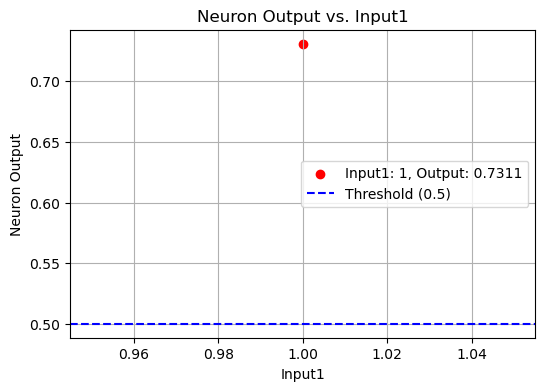

In [2]:
#Experiment-1
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the artificial neuron function
def artificial_neuron(inputs, weights, bias):
    # Compute the weighted sum
    z = np.dot(inputs, weights) + bias
    # Apply the activation function
    output = sigmoid(z)
    return output

# Example inputs, weights, and bias
inputs = np.array([1, 0])  # Example input features
weights = np.array([0.8, -0.5])  # Weights for the features
bias = 0.2  # Bias term

# Perform binary classification
output = artificial_neuron(inputs, weights, bias)

# Convert the output to binary classification
classification = 1 if output >= 0.5 else 0

# Print output and classification
print(f"Neuron Output (Before Threshold): {output:.4f}")
print(f"Binary Classification: {classification}")

# Visualize the output with a plot
plt.figure(figsize=(6, 4))
plt.scatter(inputs[0], output, color='red', label=f'Input1: {inputs[0]}, Output: {output:.4f}')
plt.axhline(y=0.5, color='blue', linestyle='--', label='Threshold (0.5)')
plt.title("Neuron Output vs. Input1")
plt.xlabel("Input1")
plt.ylabel("Neuron Output")
plt.legend()
plt.grid(True)
plt.show()


Test predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


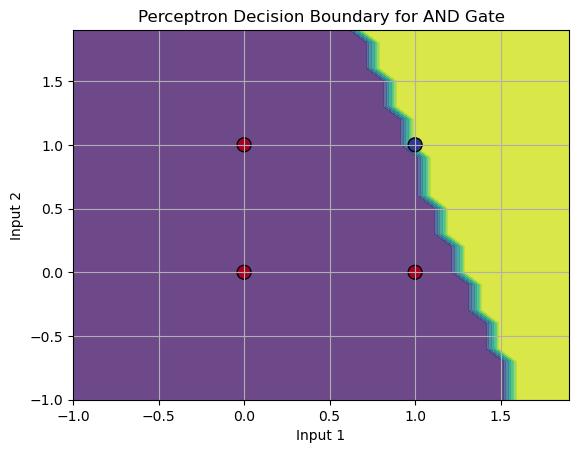

In [3]:
#Experiment -2 and gate
import numpy as np
import matplotlib.pyplot as plt

# Activation function (step function) 
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return step_function(summation)

    def train(self, inputs, labels, epochs=1000):
        for _ in range(epochs):
            for input_vector, label in zip(inputs, labels):
                prediction = self.predict(input_vector)
                error = label - prediction
                self.weights += self.learning_rate * error * input_vector
                self.bias += self.learning_rate * error

# Sample data for binary classification (AND gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])  # AND gate output

# Set random seed for reproducibility
np.random.seed(42)

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels, epochs=1000)

# Test the perceptron
print("Test predictions:")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

# Plotting the decision boundary
x1_min, x1_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
x2_min, x2_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = np.array([perceptron.predict(np.array([x, y])) for x, y in zip(np.ravel(xx), np.ravel(yy))])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdYlBu)
plt.title("Perceptron Decision Boundary for AND Gate")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


Test predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


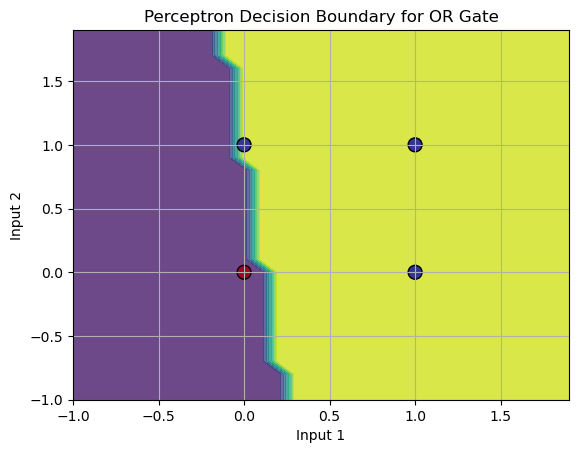

In [4]:
#Experiment or gate
import numpy as np
import matplotlib.pyplot as plt

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return step_function(summation)

    def train(self, inputs, labels, epochs=1000):
        for _ in range(epochs):
            for input_vector, label in zip(inputs, labels):
                prediction = self.predict(input_vector)
                error = label - prediction
                # Update weights and bias
                self.weights += self.learning_rate * error * input_vector
                self.bias += self.learning_rate * error

# Sample data for binary classification (OR gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # OR gate output

# Set random seed for reproducibility
np.random.seed(42)

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels, epochs=1000)

# Test the perceptron
print("Test predictions:")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

# Plotting the decision boundary
x1_min, x1_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
x2_min, x2_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = np.array([perceptron.predict(np.array([x, y])) for x, y in zip(np.ravel(xx), np.ravel(yy))])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdYlBu)
plt.title("Perceptron Decision Boundary for OR Gate")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


Epoch 0, Loss: 0.25000116144925016
Epoch 1000, Loss: 0.2500000000873685
Epoch 2000, Loss: 0.2500000000872768
Epoch 3000, Loss: 0.25000000008718526
Epoch 4000, Loss: 0.2500000000870939
Epoch 5000, Loss: 0.2500000000870025
Epoch 6000, Loss: 0.25000000008691126
Epoch 7000, Loss: 0.2500000000868202
Epoch 8000, Loss: 0.25000000008672923
Epoch 9000, Loss: 0.25000000008663836


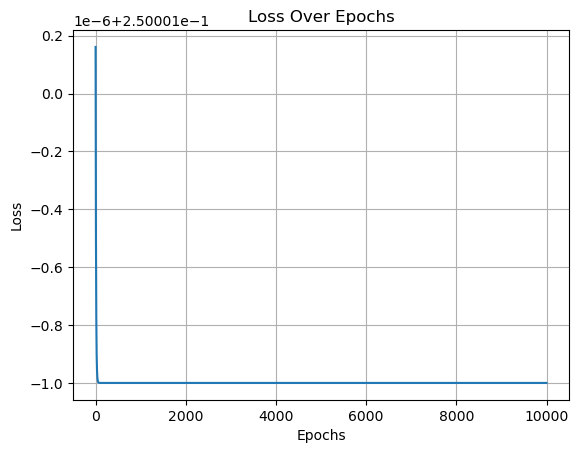

Final Predictions:
[[0.50000606]
 [0.50000046]
 [0.49999957]
 [0.49999397]]


In [6]:
#experiment-3
import numpy as np
import matplotlib.pyplot as plt

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Forward propagation
def forward_propagation(X, weights, biases):
    # Layer 1
    z1 = np.dot(X, weights["W1"]) + biases["b1"]
    a1 = sigmoid(z1)

    # Layer 2 (output layer)
    z2 = np.dot(a1, weights["W2"]) + biases["b2"]
    a2 = sigmoid(z2)

    cache = {"z1": z1, "a1": a1, "z2": z2, "a2": a2}
    return a2, cache

# Backward propagation
def backward_propagation(X, Y, weights, biases, cache):
    m = X.shape[0]  # Number of samples

    # Gradients for Layer 2
    dz2 = cache["a2"] - Y
    dW2 = np.dot(cache["a1"].T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    # Gradients for Layer 1
    dz1 = np.dot(dz2, weights["W2"].T) * sigmoid_derivative(cache["z1"])
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights = {
        "W1": np.random.randn(input_size, hidden_size) * 0.01,
        "W2": np.random.randn(hidden_size, output_size) * 0.01
    }
    biases = {
        "b1": np.zeros((1, hidden_size)),
        "b2": np.zeros((1, output_size))
    }
    return weights, biases

# Update parameters
def update_parameters(weights, biases, gradients, learning_rate):
    weights["W1"] -= learning_rate * gradients["dW1"]
    biases["b1"] -= learning_rate * gradients["db1"]
    weights["W2"] -= learning_rate * gradients["dW2"]
    biases["b2"] -= learning_rate * gradients["db2"]
    return weights, biases

# Example usage
if __name__ == "__main__":
    # Example dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
    Y = np.array([[0], [1], [1], [0]])  # XOR output

    # Hyperparameters
    input_size = 2
    hidden_size = 4
    output_size = 1
    learning_rate = 0.1
    epochs = 10000

    # Initialize parameters
    weights, biases = initialize_parameters(input_size, hidden_size, output_size)

    # Store losses for plotting
    losses = []

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        predictions, cache = forward_propagation(X, weights, biases)

        # Compute loss (mean squared error)
        loss = np.mean((predictions - Y) ** 2)
        losses.append(loss)

        # Backward propagation
        gradients = backward_propagation(X, Y, weights, biases, cache)

        # Update parameters
        weights, biases = update_parameters(weights, biases, gradients, learning_rate)

        # Print loss every 1000 epochs
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    # Plot loss over epochs
    plt.plot(range(epochs), losses)
    plt.title("Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

    # Final predictions
    final_predictions = forward_propagation(X, weights, biases)[0]
    print("Final Predictions:")
    print(final_predictions)


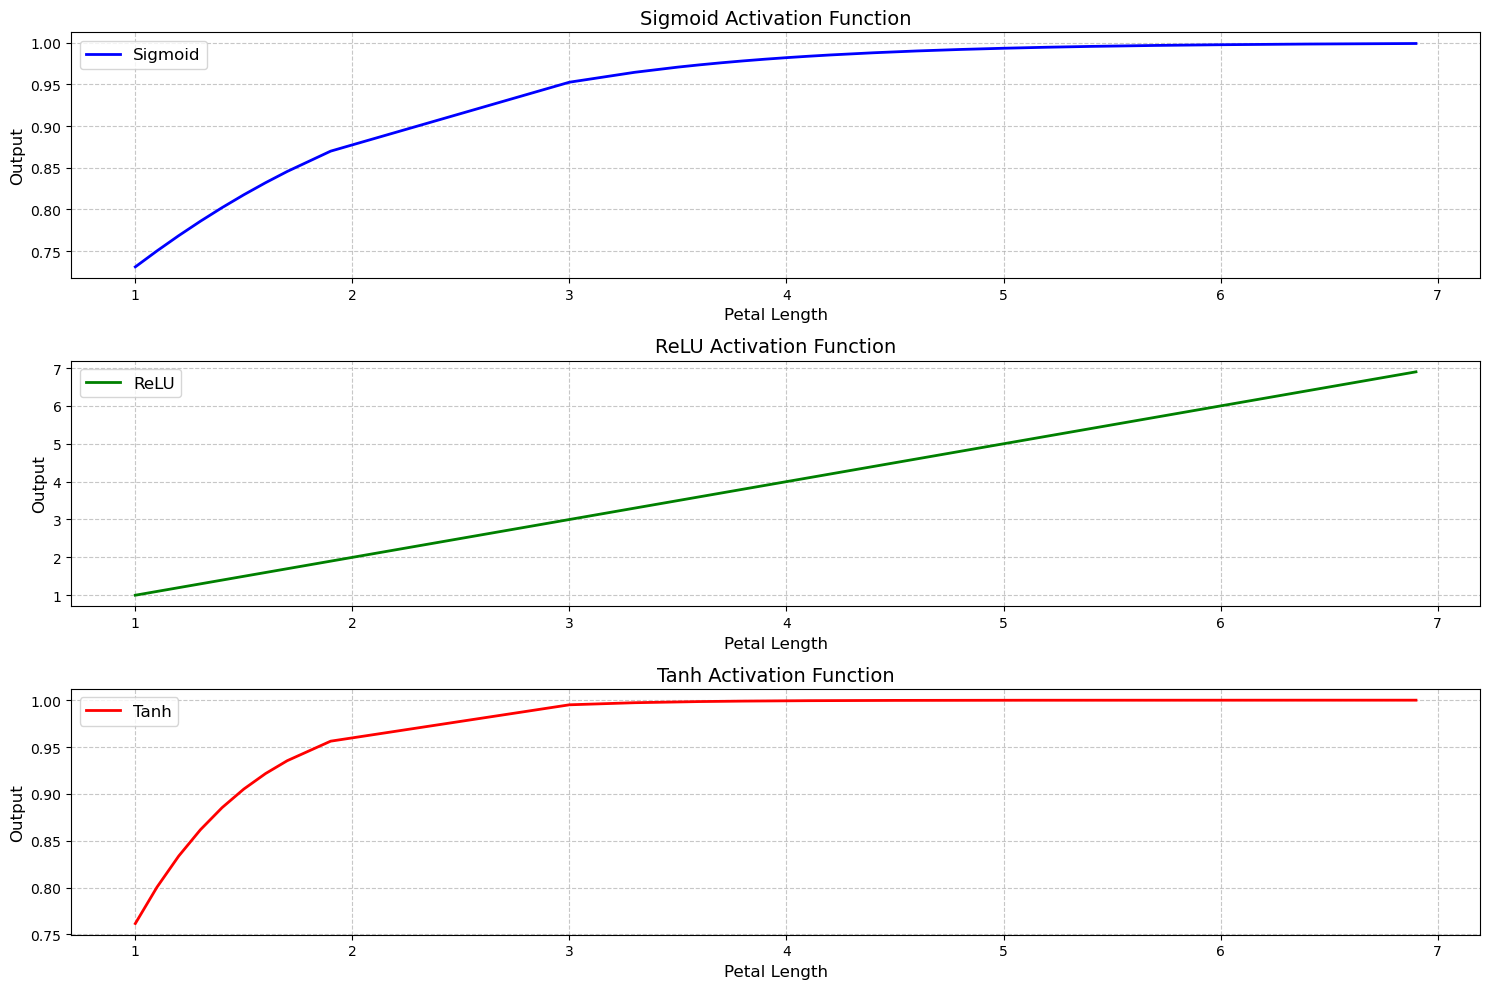

In [5]:
#Experiment -4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Load the Iris dataset from an online source
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

# Select a single feature for simplicity (e.g., petal_length)
x = data['petal_length'].values

# Apply activation functions
sigmoid_output = sigmoid(x)
relu_output = relu(x)
tanh_output = tanh(x)

# Sort x and corresponding outputs for better plots
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
sigmoid_output_sorted = sigmoid_output[sorted_indices]
relu_output_sorted = relu_output[sorted_indices]
tanh_output_sorted = tanh_output[sorted_indices]

# Plot the results
plt.figure(figsize=(15, 10))

# Sigmoid plot
plt.subplot(3, 1, 1)
plt.plot(x_sorted, sigmoid_output_sorted, label='Sigmoid', color='blue', linewidth=2)
plt.title('Sigmoid Activation Function', fontsize=14)
plt.xlabel('Petal Length', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# ReLU plot
plt.subplot(3, 1, 2)
plt.plot(x_sorted, relu_output_sorted, label='ReLU', color='green', linewidth=2)
plt.title('ReLU Activation Function', fontsize=14)
plt.xlabel('Petal Length', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Tanh plot
plt.subplot(3, 1, 3)
plt.plot(x_sorted, tanh_output_sorted, label='Tanh', color='red', linewidth=2)
plt.title('Tanh Activation Function', fontsize=14)
plt.xlabel('Petal Length', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


Epoch 0, Loss: 0.25000116144925016
Epoch 1000, Loss: 0.2500000000873685
Epoch 2000, Loss: 0.2500000000872768
Epoch 3000, Loss: 0.25000000008718526
Epoch 4000, Loss: 0.2500000000870939
Epoch 5000, Loss: 0.2500000000870025
Epoch 6000, Loss: 0.25000000008691126
Epoch 7000, Loss: 0.2500000000868202
Epoch 8000, Loss: 0.25000000008672923
Epoch 9000, Loss: 0.25000000008663836
Final Predictions:
[[0.50000606]
 [0.50000046]
 [0.49999957]
 [0.49999397]]


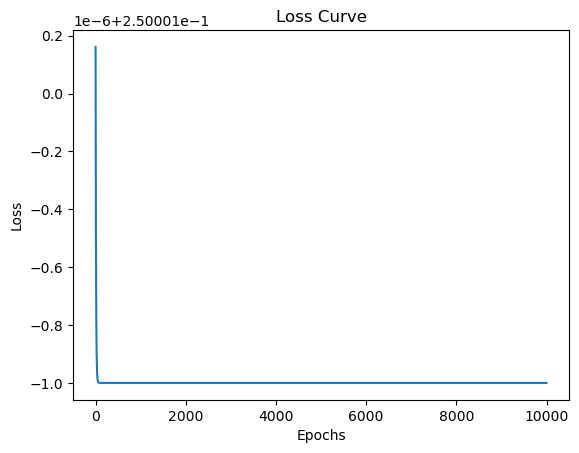

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Forward propagation
def forward_propagation(X, weights, biases):
    # Layer 1
    z1 = np.dot(X, weights["W1"]) + biases["b1"]
    a1 = sigmoid(z1)

    # Layer 2 (output layer)
    z2 = np.dot(a1, weights["W2"]) + biases["b2"]
    a2 = sigmoid(z2)

    cache = {"z1": z1, "a1": a1, "z2": z2, "a2": a2}
    return a2, cache

# Backward propagation
def backward_propagation(X, Y, weights, biases, cache):
    m = X.shape[0]  # Number of samples

    # Gradients for Layer 2
    dz2 = cache["a2"] - Y
    dW2 = np.dot(cache["a1"].T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    # Gradients for Layer 1
    dz1 = np.dot(dz2, weights["W2"].T) * sigmoid_derivative(cache["z1"])
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights = {
        "W1": np.random.randn(input_size, hidden_size) * 0.01,
        "W2": np.random.randn(hidden_size, output_size) * 0.01
    }
    biases = {
        "b1": np.zeros((1, hidden_size)),
        "b2": np.zeros((1, output_size))
    }
    return weights, biases

# Update parameters
def update_parameters(weights, biases, gradients, learning_rate):
    weights["W1"] -= learning_rate * gradients["dW1"]
    biases["b1"] -= learning_rate * gradients["db1"]
    weights["W2"] -= learning_rate * gradients["dW2"]
    biases["b2"] -= learning_rate * gradients["db2"]
    return weights, biases

# Example usage
if __name__ == "__main__":
    # Example dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
    Y = np.array([[0], [1], [1], [0]])  # XOR output

    # Hyperparameters
    input_size = 2
    hidden_size = 4
    output_size = 1
    learning_rate = 0.1
    epochs = 10000

    # Initialize parameters
    weights, biases = initialize_parameters(input_size, hidden_size, output_size)

    # To store the loss at each epoch
    loss_history = []

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        predictions, cache = forward_propagation(X, weights, biases)

        # Compute loss (mean squared error)
        loss = np.mean((predictions - Y) ** 2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X, Y, weights, biases, cache)

        # Update parameters
        weights, biases = update_parameters(weights, biases, gradients, learning_rate)

        # Print loss every 1000 epochs
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    # Final predictions
    final_predictions = forward_propagation(X, weights, biases)[0]
    print("Final Predictions:")
    print(final_predictions)

    # Plotting the loss curve
    plt.plot(range(epochs), loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()
